In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/soccer-players-values-and-their-statistics/transfermarkt_fbref_201819.csv
/kaggle/input/soccer-players-values-and-their-statistics/transfermarkt_fbref_201718.csv
/kaggle/input/soccer-players-values-and-their-statistics/transfermarkt_fbref_201920.csv


# Loading the Dataset

In [2]:
df_1718 = pd.read_csv('../input/soccer-players-values-and-their-statistics/transfermarkt_fbref_201718.csv', 
                      delimiter=';', index_col=0)
df_1819 = pd.read_csv('../input/soccer-players-values-and-their-statistics/transfermarkt_fbref_201819.csv', 
                      delimiter=';', index_col=0)
df_1920 = pd.read_csv('../input/soccer-players-values-and-their-statistics/transfermarkt_fbref_201920.csv', 
                      delimiter=';', index_col=0)

/tmp/ipykernel_17/325947871.py:3: DtypeWarning: Columns (395) have mixed types. Specify dtype option on import or set low_memory=False.
  df_1819 = pd.read_csv('../input/soccer-players-values-and-their-statistics/transfermarkt_fbref_201819.csv',


In [3]:
df_1718.head()

,player,nationality,position,squad,age,birth_year,value,height,position2,foot,...,Pts/G,xG,xGA,xGDiff,xGDiff/90,Attendance,CL,WinCL,CLBestScorer,Season
379,Burgui,es ESP,"FW,MF",Alavés,23,1993,1800000,186,attack - Left Winger,right,...,1.24,39.0,53.2,-14.2,-0.37,"16,819",0,0,0,201718#
2530,Raphaël Varane,fr FRA,DF,Real Madrid,24,1993,70000000,191,Defender - Centre-Back,right,...,2.00,83.3,45.4,37.9,1.00,66161,1,1,0,201718#
721,Rubén Duarte,es ESP,DF,Alavés,21,1995,2000000,179,Defender - Left-Back,left,...,1.24,39.0,53.2,-14.2,-0.37,"16,819",0,0,0,201718#
2512,Samuel Umtiti,fr FRA,DF,Barcelona,23,1993,60000000,182,Defender - Centre-Back,left,...,2.45,78.3,41.1,37.2,0.98,66603,1,0,0,201718#
882,Manu García,es ESP,MF,Alavés,31,1986,1800000,183,midfield - Defensive Midfield,left,...,1.24,39.0,53.2,-14.2,-0.37,"16,819",0,0,0,201718#


## Adding a year column and combining the dataset into 1 dataframe.

In [4]:
df_1718['year'] = 2017
df_1819['year'] = 2018
df_1920['year'] = 2019

In [5]:
og_df = pd.concat([df_1718, df_1819, df_1920])
og_df.shape

(7108, 400)

In [6]:
og_df.head()

,player,nationality,position,squad,age,birth_year,value,height,position2,foot,...,xG,xGA,xGDiff,xGDiff/90,Attendance,CL,WinCL,CLBestScorer,Season,year
379.0,Burgui,es ESP,"FW,MF",Alavés,23.0,1993.0,1800000.0,186.0,attack - Left Winger,right,...,39.0,53.2,-14.2,-0.37,"16,819",0.0,0.0,0.0,201718#,2017
2530.0,Raphaël Varane,fr FRA,DF,Real Madrid,24.0,1993.0,70000000.0,191.0,Defender - Centre-Back,right,...,83.3,45.4,37.9,1.00,66161,1.0,1.0,0.0,201718#,2017
721.0,Rubén Duarte,es ESP,DF,Alavés,21.0,1995.0,2000000.0,179.0,Defender - Left-Back,left,...,39.0,53.2,-14.2,-0.37,"16,819",0.0,0.0,0.0,201718#,2017
2512.0,Samuel Umtiti,fr FRA,DF,Barcelona,23.0,1993.0,60000000.0,182.0,Defender - Centre-Back,left,...,78.3,41.1,37.2,0.98,66603,1.0,0.0,0.0,201718#,2017
882.0,Manu García,es ESP,MF,Alavés,31.0,1986.0,1800000.0,183.0,midfield - Defensive Midfield,left,...,39.0,53.2,-14.2,-0.37,"16,819",0.0,0.0,0.0,201718#,2017


Exploring the dataset and handling missing values

In [7]:
# Check the structure and data types of the dataset
og_df.info()

# Check for any missing values
og_df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
Index: 7108 entries, 379.0 to 2615.0
Columns: 400 entries, player to year
dtypes: float64(390), int64(1), object(9)
memory usage: 21.7+ MB


player          132
nationality     132
position        132
squad           132
age             132
               ... 
CL              132
WinCL           132
CLBestScorer    412
Season          132
year              0
Length: 400, dtype: int64

# Dealing with Missing Values
I noticed that the number of missing values is the same for all of the columns except 1 which would mean if I drop rows with missing player values it should handle all the other missing values aswell.

In [8]:
og_df.dropna(subset=['player'], inplace=True)

In [9]:
# Check missing values across columns to ensure they are resolved
print(og_df.isnull().sum())

player            0
nationality       0
position          0
squad             0
age               0
               ... 
CL                0
WinCL             0
CLBestScorer    412
Season            0
year              0
Length: 400, dtype: int64


In [10]:
og_df['CLBestScorer'] = og_df['CLBestScorer'].fillna(0)  

# Selecting the features and the model.

In [11]:
# Selecting relevant features
features = ['age', 'games', 'goals', 'value']
new_df = og_df[features]

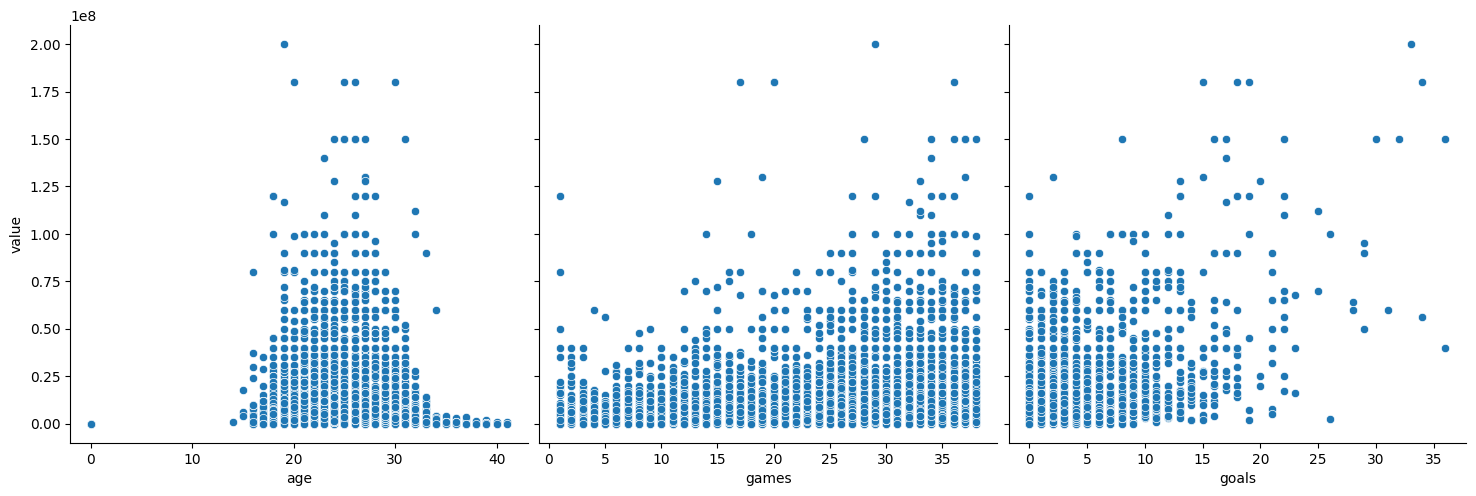

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(new_df, x_vars=['age', 'games', 'goals'], y_vars='value', height=5)
plt.show()

### Taking the log of value because there is a high variance in the value of players. 
A players market value has a wide span of values which can affect the model performance. 

In [13]:
new_df['value_log'] = np.log1p(new_df['value'])

/tmp/ipykernel_17/1467850279.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['value_log'] = np.log1p(new_df['value'])


### Splitting the data into train and test data.

In [14]:
from sklearn.model_selection import train_test_split

X = new_df[['age', 'games', 'goals']]
y = new_df['value_log']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Training the Linear Regression model

In [15]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

## Checking model performance

In [16]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

Mean Squared Error: 3.088720392313196
R^2 Score: 0.30770140138674296


## Based on the MSE and R^2 the model seems pretty bad, but it will do.

In [17]:
feature_importance = pd.Series(model.coef_, index=X.columns)
print(feature_importance)

age     -0.090163
games    0.084353
goals    0.100002
dtype: float64


## Using pickle to use the model in my web app

In [18]:
import pickle

# Save the model to a file
model_filename = '/kaggle/working/soccer_model.pkl'
with open(model_filename, 'wb') as file:
    pickle.dump(model, file)